In [58]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.utils import resample

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from wordcloud import WordCloud, STOPWORDS

In [3]:
df=pd.read_csv('Clean_Tweets_DT.csv')
df.head()

,Unnamed: 0,label,text,clean_text,Tweet_tokenized,Tweet_without_stop,Tweet_stemmed,Tweet_lemmatized
0,0,socialworker,"As social workers, we will be tested throughou...",As social workers we will be tested throughout...,"['as', 'social', 'workers', 'we', 'will', 'be'...","['social', 'workers', 'tested', 'throughout', ...","['social', 'worker', 'test', 'throughout', 'ca...","['social', 'worker', 'tested', 'throughout', '..."
1,1,socialworker,RT @eunice_lumsden: Excellent Helen. When I f...,RT eunicelumsden Excellent Helen When I found...,"['rt', 'eunicelumsden', 'excellent', 'helen', ...","['rt', 'eunicelumsden', 'excellent', 'helen', ...","['rt', 'eunicelumsden', 'excel', 'helen', 'fou...","['rt', 'eunicelumsden', 'excellent', 'helen', ..."
2,2,socialworker,Flowers for Friday! #friday #doodle #sharpies ...,Flowers for Friday friday doodle sharpies expr...,"['flowers', 'for', 'friday', 'friday', 'doodle...","['flowers', 'friday', 'friday', 'doodle', 'sha...","['flower', 'friday', 'friday', 'doodl', 'sharp...","['flower', 'friday', 'friday', 'doodle', 'shar..."
3,3,socialworker,#Smt_Tulsi_Gowda\r\n#socialworker \r\n#PadmaSh...,SmtTulsiGowda\r\nsocialworker \r\nPadmaShriAwa...,"['smttulsigowda', 'socialworker', 'padmashriaw...","['smttulsigowda', 'socialworker', 'padmashriaw...","['smttulsigowda', 'socialwork', 'padmashriawar...","['smttulsigowda', 'socialworker', 'padmashriaw..."
4,4,socialworker,RT @PAHospice: *Vacancy*\r\nWe're looking for ...,RT PAHospice Vacancy\r\nWere looking for an ex...,"['rt', 'pahospice', 'vacancy', 'were', 'lookin...","['rt', 'pahospice', 'vacancy', 'looking', 'exp...","['rt', 'pahospic', 'vacanc', 'look', 'experien...","['rt', 'pahospice', 'vacancy', 'looking', 'exp..."


In [4]:
df = df[['label','Tweet_lemmatized']]
df.head()

,label,Tweet_lemmatized
0,socialworker,"['social', 'worker', 'tested', 'throughout', '..."
1,socialworker,"['rt', 'eunicelumsden', 'excellent', 'helen', ..."
2,socialworker,"['flower', 'friday', 'friday', 'doodle', 'shar..."
3,socialworker,"['smttulsigowda', 'socialworker', 'padmashriaw..."
4,socialworker,"['rt', 'pahospice', 'vacancy', 'looking', 'exp..."


In [5]:
final_tweets=[i.replace(",","").replace("[","").replace("]","").replace("'","") for i in df['Tweet_lemmatized']]
final_tweets[0:5]

['social worker tested throughout career here attitude service authenticity grit httpstcokfkbatok',
 'rt eunicelumsden excellent helen found ecsdn yr ago wish studied becoming socialworker h ',
 'flower friday friday doodle sharpy expressiveartstherapist socialworker certifiedtreprovider calgar httpstcopcrwekufha',
 'smttulsigowda socialworker padmashriaward karanatakatourism karanataka tribel woman httpstcowvrlyeht',
 'rt pahospice vacancy looking experienced socialworker great communication counselling advocacy skill suppor ']

In [6]:
df['final_tweets']=final_tweets

In [7]:
df=df.drop('Tweet_lemmatized',axis=1)
df.head()

,label,final_tweets
0,socialworker,social worker tested throughout career here at...
1,socialworker,rt eunicelumsden excellent helen found ecsdn y...
2,socialworker,flower friday friday doodle sharpy expressivea...
3,socialworker,smttulsigowda socialworker padmashriaward kara...
4,socialworker,rt pahospice vacancy looking experienced socia...


Text(0, 0.5, 'Frequency')

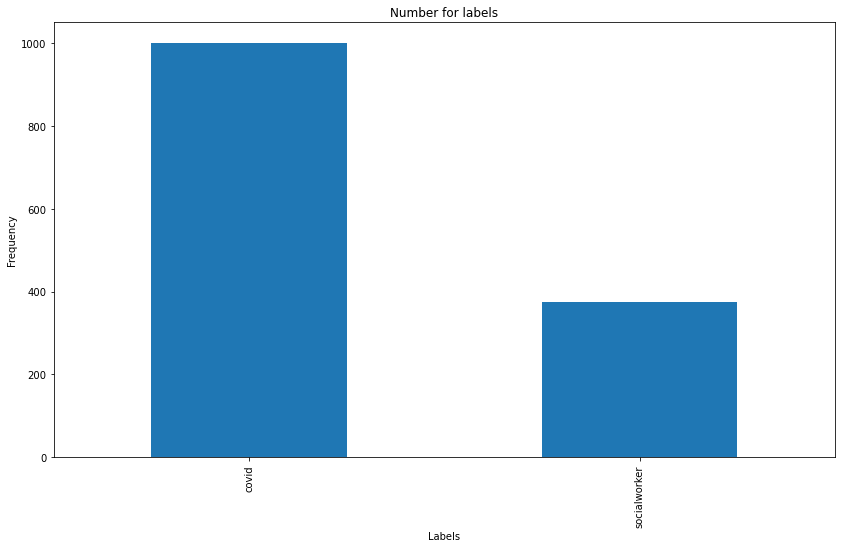

In [8]:
ax = df['label'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for labels")
ax.set_xlabel("Labels")
ax.set_ylabel("Frequency")

In [11]:
# Separate majority and minority classes
df_majority = df[df.label=='covid']
df_minority = df[df.label=='socialworker']
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.label.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64

socialworker    376
covid           376
Name: label, dtype: int64

In [12]:
X=df_downsampled['final_tweets'].values
y=df_downsampled['label'].values

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [15]:
print("No. of rows for train data : ",X_train.shape[0])
print("No. of rows for test data : ",y_test.shape[0])

No. of rows for train data :  564
No. of rows for test data :  188


In [16]:
vectorizer = CountVectorizer()
X_train1 = vectorizer.fit_transform(X_train.astype('U')) 
X_test1 = vectorizer.transform(X_test.astype('U'))

In [56]:
#Wordcloud
topics = ['socialwork','covid']

In [59]:
List_of_WC=[]

for mytopic in topics:

    tempdf = df_downsampled[df_downsampled['label'] == mytopic]
    print(tempdf)
    
    tempdf =tempdf.sum(axis=0,numeric_only=True)
    print(tempdf)
    
    
    NextVarName=str("wc"+str(mytopic))
    NextVarName = WordCloud(width=1000, height=600, background_color="white",
                   min_word_length=4, #mask=next_image,
                   max_words=200).generate_from_frequencies(tempdf)
    
    List_of_WC.append(NextVarName)
    
print(List_of_WC)
#Plotting the wordclouds
fig=plt.figure(figsize=(25, 25))

NumTopics=len(topics)
for i in range(NumTopics):
    print(i)
    ax = fig.add_subplot(NumTopics,1,i+1)
    plt.imshow(List_of_WC[i], interpolation='bilinear')
    plt.axis("off")
    plt.savefig("NewClouds.pdf")

Empty DataFrame
Columns: [label, final_tweets]
Index: []
Series([], dtype: float64)


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
#################DECISION TREE 1 ##################

In [36]:
dt1 = DecisionTreeClassifier(random_state=10,criterion = "entropy", splitter = "best",max_depth = 4)
dt1.fit(X_train1, y_train)
y_pred = dt1.predict(X_test1)
Classification_report_1 = classification_report(y_test, y_pred)
conf_matrix_1 = confusion_matrix(y_test, y_pred)

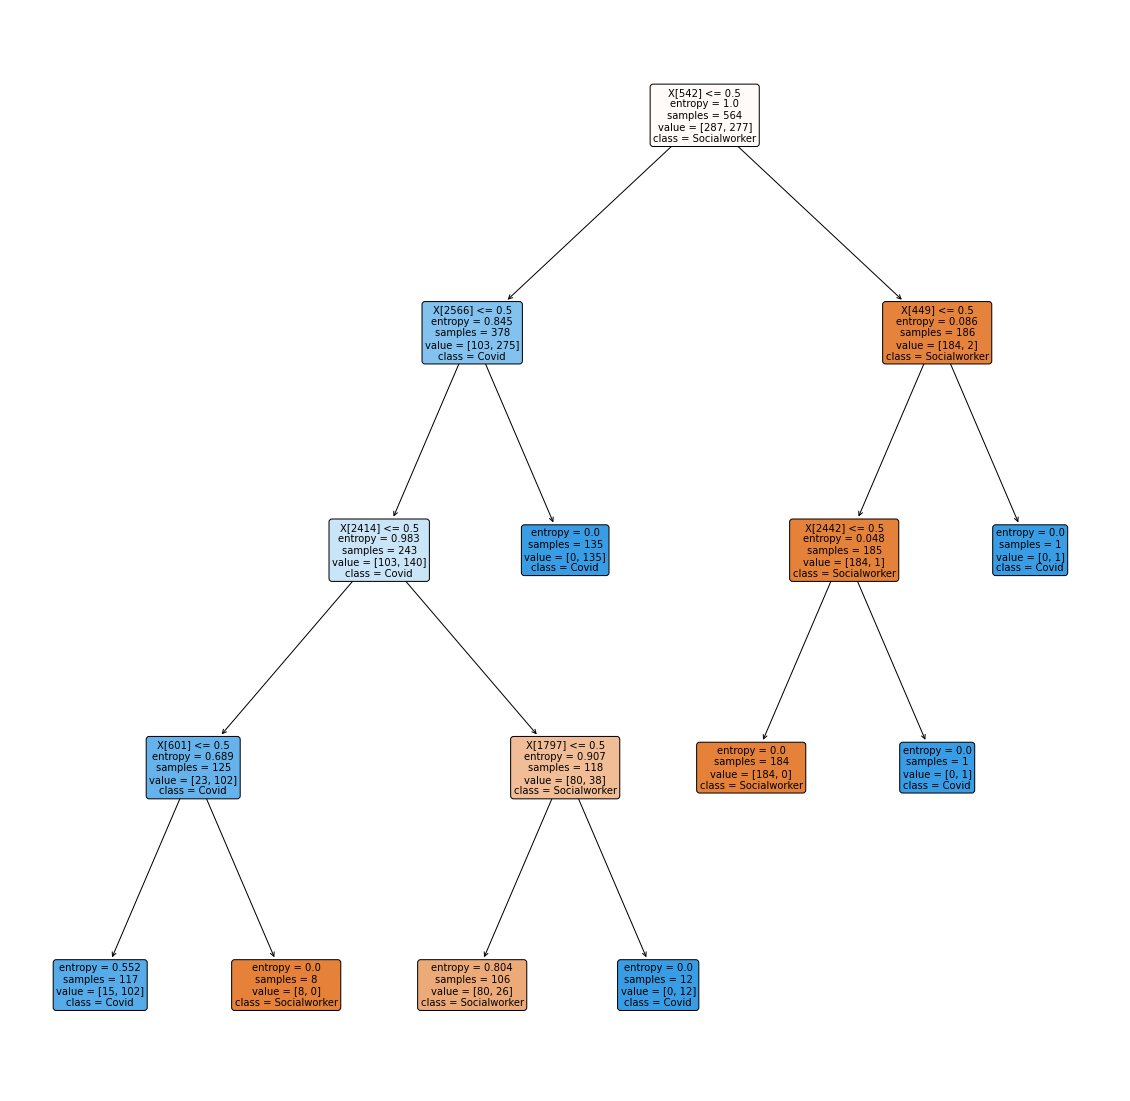

In [37]:
plt.figure(figsize = (20,20))
dec_tree_1 = plot_tree(decision_tree=dt1,class_names=["Socialworker","Covid"],filled=True, rounded=True, fontsize=10, max_depth=6)





Accuracy 0.8776595744680851
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        89
           1       0.89      0.88      0.88        99

    accuracy                           0.88       188
   macro avg       0.88      0.88      0.88       188
weighted avg       0.88      0.88      0.88       188



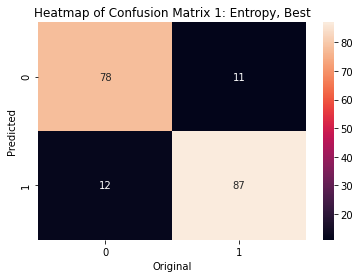

In [38]:
#Confusion matrix seaborn
sns.heatmap(conf_matrix_1,annot=True)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Heatmap of Confusion Matrix 1: Entropy, Best')
plt.savefig('Confusion_Matrix1.png')

#Accuracy
print('Accuracy',metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


In [ ]:
#################DECISION TREE 2 ##################

In [45]:
dt2 = DecisionTreeClassifier(random_state=10,criterion = "gini", splitter = "random",max_depth = 5)
dt2.fit(X_train1, y_train)
y_pred = dt2.predict(X_test1)
Classification_report_2 = classification_report(y_test, y_pred)
conf_matrix_2 = confusion_matrix(y_test, y_pred)

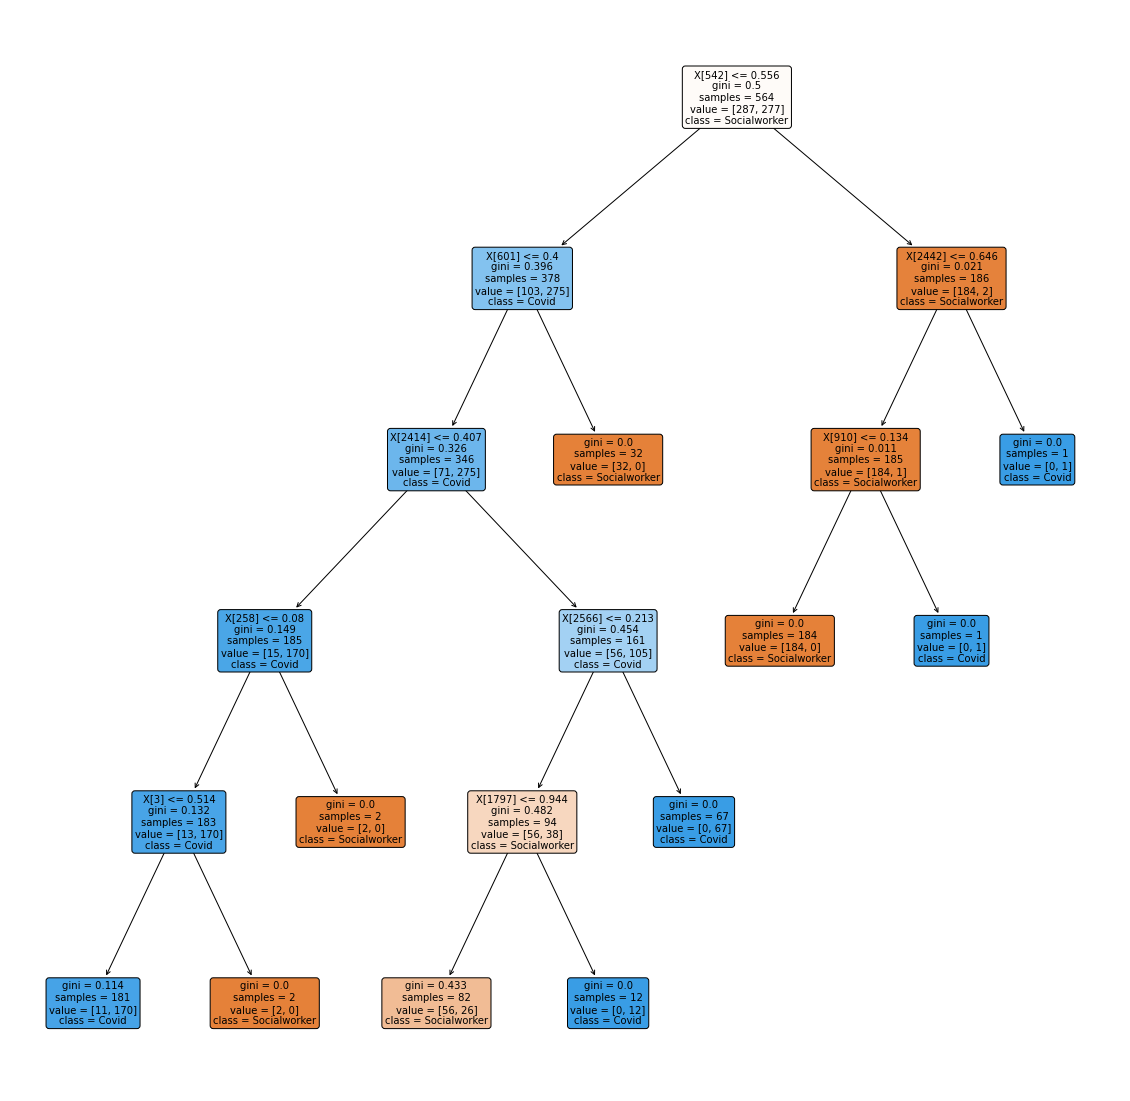

In [46]:
plt.figure(figsize = (20,20))
dec_tree_2 = plot_tree(decision_tree=dt2,class_names=["Socialworker","Covid"],filled=True, rounded=True, fontsize=10, max_depth=6)





Accuracy 0.8829787234042553
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        89
           1       0.90      0.88      0.89        99

    accuracy                           0.88       188
   macro avg       0.88      0.88      0.88       188
weighted avg       0.88      0.88      0.88       188



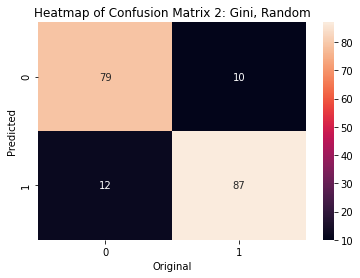

In [47]:
#Confusion matrix seaborn
sns.heatmap(conf_matrix_2,annot=True)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Heatmap of Confusion Matrix 2: Gini, Random')
plt.savefig('Confusion_Matrix2.png')

#Accuracy
print('Accuracy',metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


In [ ]:
#################DECISION TREE 3 ##################

In [53]:
dt3 = DecisionTreeClassifier(random_state=0,criterion = "entropy", splitter = "random",max_depth = 4)
dt3.fit(X_train1, y_train)
y_pred = dt3.predict(X_test1)
Classification_report_3 = classification_report(y_test, y_pred)
conf_matrix_3 = confusion_matrix(y_test, y_pred)

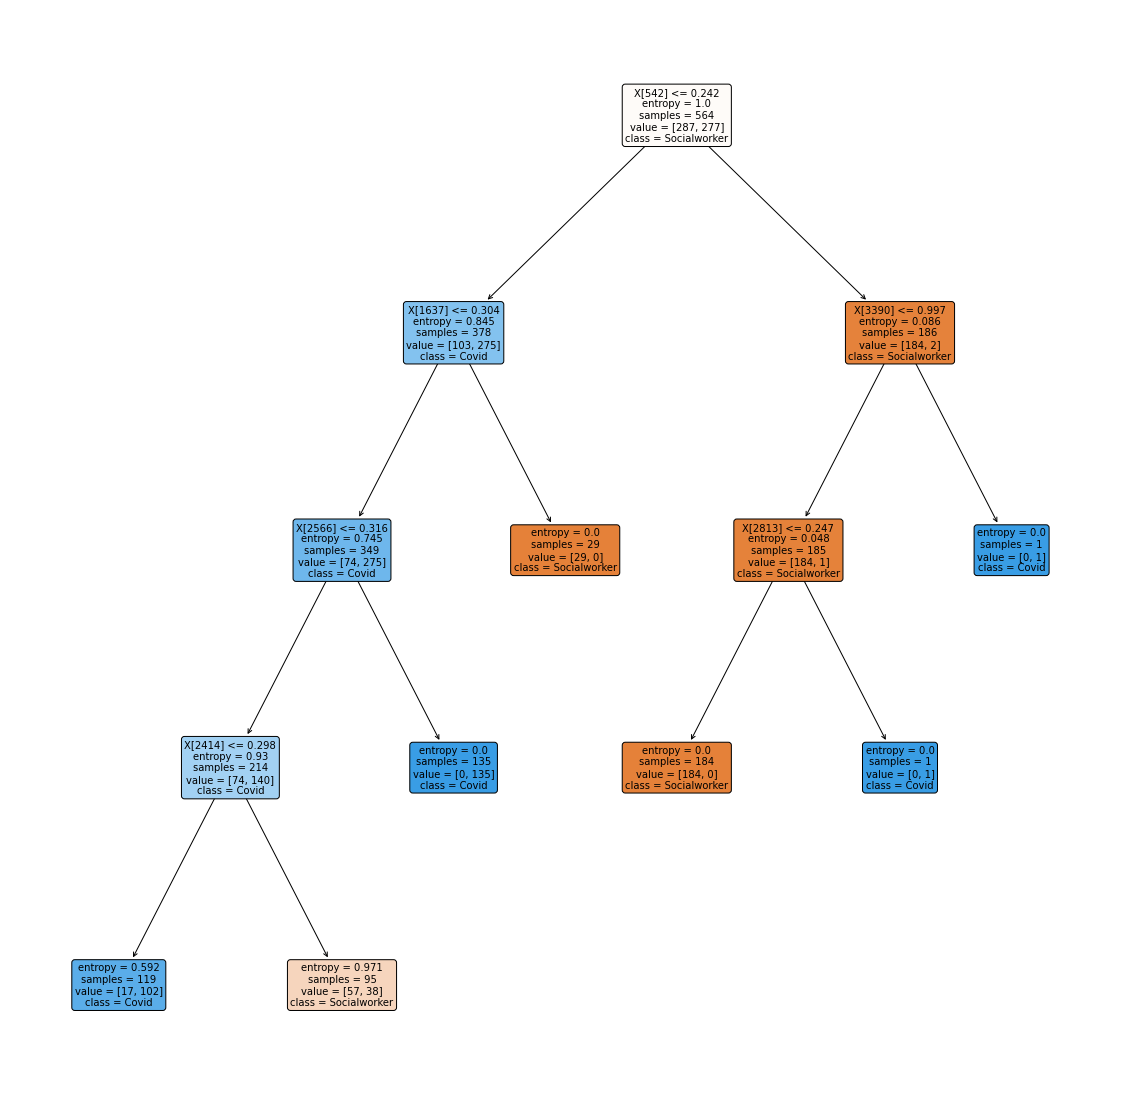

In [54]:
plt.figure(figsize = (20,20))
dec_tree_3 = plot_tree(decision_tree=dt3,class_names=["Socialworker","Covid"],filled=True, rounded=True, fontsize=10, max_depth=6)





Accuracy 0.851063829787234
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        89
           1       0.87      0.84      0.86        99

    accuracy                           0.85       188
   macro avg       0.85      0.85      0.85       188
weighted avg       0.85      0.85      0.85       188



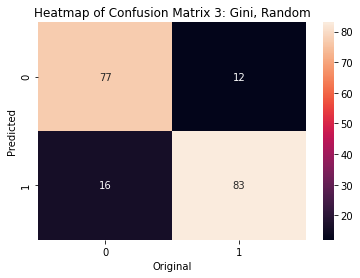

In [55]:
#Confusion matrix seaborn
sns.heatmap(conf_matrix_3,annot=True)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Heatmap of Confusion Matrix 3: Gini, Random')
plt.savefig('Confusion_Matrix3.png')

#Accuracy
print('Accuracy',metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
